# Retrieving data from GitHub API v3

In [1]:
import pandas as pd
import requests
import json

import os
from modules import config

In [2]:
# Establishing authentication
username = 'danovad'
token = config.GITHUB_TOKEN # Token coming from config.py

In [5]:
r = requests.get("https://api.github.com/rate_limit", auth=(username,token))
r.status_code

json.loads(r.content)

{'resources': {'core': {'limit': 5000,
   'used': 0,
   'remaining': 5000,
   'reset': 1599506784},
  'search': {'limit': 30, 'used': 0, 'remaining': 30, 'reset': 1599503244},
  'graphql': {'limit': 5000,
   'used': 0,
   'remaining': 5000,
   'reset': 1599506784},
  'integration_manifest': {'limit': 5000,
   'used': 0,
   'remaining': 5000,
   'reset': 1599506784},
  'source_import': {'limit': 100,
   'used': 0,
   'remaining': 100,
   'reset': 1599503244},
  'code_scanning_upload': {'limit': 500,
   'used': 0,
   'remaining': 500,
   'reset': 1599506784}},
 'rate': {'limit': 5000, 'used': 0, 'remaining': 5000, 'reset': 1599506784}}

Handful of functions to retrieve data?

In [6]:
def github_request(user, endpoint = None):
    ''' Function to retrieve user details.
    If endpoint = None, then it will retrieve user info. 
    If endpoint is set to 
    "following", 
    "followers", 
    "repos", 
    "subscriptions",
    "events", etc it will handle those requests as such. '''
    # url for get request 
    if endpoint is not None:
        url = f'https://api.github.com/users/{user}/{endpoint}'
        print(f"Requesting {url}")
    else:
        url = f'https://api.github.com/users/{user}'
        print(f"Requesting {url}")
    
    # make the get request
    r = requests.get(url, auth=(username,token))
    if r.status_code != 200:
        print("Something went wrong.")
    # unpack and return
    return json.loads(r.content)

In [7]:
def github_request_by_url(url):
    # make the get request
    r = requests.get(url, auth=(username,token))
    
    # unpack and return
    return json.loads(r.content)

In [13]:
def generate_user_details_dict(user):
    ''' Function generates a dictionary for a specific user. 
    
    This combines user details and users following.'''
    
    # First we need to get the users details
    user_details_dict = github_request(user)

    # Add user_following_list login names to user_details_dict as a key:value pair (login:list of logins)
    user_details_dict['following_users'] = [user['login'] for user in github_request(user, endpoint = 'following')]
    user_details_dict['followers_users'] = [user['login'] for user in github_request(user, endpoint = 'followers')]
    
    return user_details_dict



In [ ]:
# Testing
generate_user_details_dict('danovad')

In [12]:
def return_following_details_list(user):
    users_details_list = []
    users_details_list.append(generate_user_details_dict(user))
    
    # Loop over all users following and generate their own user details dictionaries.
    for fol_user in users_details_list[0]['following_users']:
        print(fol_user)
        users_details_list.append(generate_user_details_dict(fol_user))
        
    return users_details_list

In [ ]:
github_request_by_url('https://api.github.com/rate_limit')

In [15]:
users_details_list = return_following_details_list('danovad')

Requesting https://api.github.com/users/danovad
Requesting https://api.github.com/users/danovad/following
Requesting https://api.github.com/users/danovad/followers
pjreddie
Requesting https://api.github.com/users/pjreddie
Requesting https://api.github.com/users/pjreddie/following
Requesting https://api.github.com/users/pjreddie/followers
yovadia
Requesting https://api.github.com/users/yovadia
Requesting https://api.github.com/users/yovadia/following
Requesting https://api.github.com/users/yovadia/followers
josephofiowa
Requesting https://api.github.com/users/josephofiowa
Requesting https://api.github.com/users/josephofiowa/following
Requesting https://api.github.com/users/josephofiowa/followers
tomerovadia
Requesting https://api.github.com/users/tomerovadia
Requesting https://api.github.com/users/tomerovadia/following
Requesting https://api.github.com/users/tomerovadia/followers
matthewbrems
Requesting https://api.github.com/users/matthewbrems
Requesting https://api.github.com/users/ma

In [18]:
#users_details_list[0]

In [19]:
import networkx as nx

In [20]:
a = {user['login']:user['following_users'] for user in users_details_list}

In [22]:
G = nx.DiGraph(a)

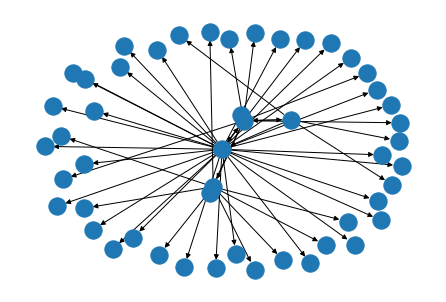

In [23]:
nx.drawing.draw(G)

In [ ]:
## Testing to create generate_user_details_dict function

users_list = []

user_details_dict = github_request('danovad')
#user_following_list = github_request('danovad', endpoint = 'following')
user_details_dict['following'] = [user['login'] for user in github_request('danovad', endpoint = 'following')]

users_list.append(user_details_dict)

In [ ]:
features = ['login','id','type','followers','following','public_repos','bio','updated_at','created_at']